## Older Half: Spousal Age Gap

Using the Indian electoral roll data, we estimate gap between the ages of husband and wife, and how the age difference varies across states, and by the age of husband and wife. 

On average, the husbands are XX years older than their wives. The difference is highly variable and systematically varies across states and by age of the husband and wife. The age gap is larger for older husbands.

* [Research design](#research-design)
* [Scripts for finding couples and analysis](#scripts)
* [Underlying data that can be downloaded](#data)

### Research Design

We exploit the fact that for married women, electoral rolls have the husband's name. The basic analysis is as follows: within each household, we find all married couples (where both the spouses are alive). For each married couple, we calculate the difference between their average. Our final dataset has the following fields: `husband_age, wife_age, household_id, state, electoral_roll_year`. We next normalize ages so that all ages are using current year as 2017. Next, we do a density plot of the differences, and present mean, median, and standard deviation. Next, we check whether the difference is statistically significant from 0. Next, we present boxplots by states. And lastly, we plot difference as a function of age of husband and wife. 

In [1]:
# import the necessary libraries 
%matplotlib inline 
import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd
from glob import glob
import os
from functools import partial

In [2]:
%%time
# Load data from CSVs
fns = sorted(glob('../../finding-couples/output_lev_0/*_exact_match_lev_0.*'))
adf = pd.concat(map(partial(pd.read_csv, usecols=['wife_age', 'husband_age', 'state']), fns), ignore_index=True)
adf

CPU times: user 1min 7s, sys: 2.33 s, total: 1min 9s
Wall time: 1min 16s


wife_age  husband_age        state
0               39           43      andaman
1               32           47      andaman
2               34           34      andaman
3               43           47      andaman
4               40           48      andaman
...            ...          ...          ...
73542636        49           59  uttarakhand
73542637        23           24  uttarakhand
73542638        38           43  uttarakhand
73542639        31           34  uttarakhand
73542640        30           31  uttarakhand

[73542641 rows x 3 columns]

In [3]:
%%time
# Filter for age range below 18 and above 100
invalid_age = adf[(adf.wife_age < 18)|(adf.wife_age > 100)|(adf.husband_age < 18)|(adf.husband_age > 100)]
invalid_age

CPU times: user 604 ms, sys: 342 ms, total: 946 ms
Wall time: 1.05 s


wife_age  husband_age        state
6242           100          113      andaman
18236           42          103      andaman
25268           73          102      andaman
25502           79          104      andaman
26972           83          102      andaman
...            ...          ...          ...
73539006        34            3  uttarakhand
73539202        34            3  uttarakhand
73540256        35            3  uttarakhand
73540824        34            3  uttarakhand
73541926        32            3  uttarakhand

[3892535 rows x 3 columns]

In [4]:
%%time
# Take out the invalid age range
adf.drop(invalid_age.index, inplace=True)
adf

CPU times: user 2.87 s, sys: 1.05 s, total: 3.92 s
Wall time: 3.93 s


wife_age  husband_age        state
0               39           43      andaman
1               32           47      andaman
2               34           34      andaman
3               43           47      andaman
4               40           48      andaman
...            ...          ...          ...
73542636        49           59  uttarakhand
73542637        23           24  uttarakhand
73542638        38           43  uttarakhand
73542639        31           34  uttarakhand
73542640        30           31  uttarakhand

[69650106 rows x 3 columns]

In [5]:
adf['gap'] = adf['husband_age'] - adf['wife_age']
adf

wife_age  husband_age        state  gap
0               39           43      andaman    4
1               32           47      andaman   15
2               34           34      andaman    0
3               43           47      andaman    4
4               40           48      andaman    8
...            ...          ...          ...  ...
73542636        49           59  uttarakhand   10
73542637        23           24  uttarakhand    1
73542638        38           43  uttarakhand    5
73542639        31           34  uttarakhand    3
73542640        30           31  uttarakhand    1

[69650106 rows x 4 columns]

In [6]:
adf.describe().round(1)

wife_age  husband_age         gap
count  69650106.0   69650106.0  69650106.0
mean         43.9         48.0         4.1
std          13.5         14.0         5.5
min          18.0         18.0       -82.0
25%          33.0         37.0         2.0
50%          43.0         47.0         3.0
75%          53.0         57.0         5.0
max         100.0        100.0        81.0

In [7]:
adf.groupby(['state']).describe().round(1)

wife_age                                             \
                  count  mean   std   min   25%   50%   75%    max   
state                                                                
andaman         36577.0  43.9  10.8  18.0  36.0  42.0  50.0   94.0   
andhra        1146088.0  40.0  12.1  18.0  30.0  38.0  48.0  100.0   
arunachal      130331.0  41.6  11.8  18.0  33.0  40.0  49.0  100.0   
assam          185336.0  40.6  11.4  18.0  32.0  39.0  48.0   99.0   
bihar        10903838.0  44.2  12.9  18.0  34.0  44.0  53.0  100.0   
chandigarh     112677.0  44.5  12.3  19.0  35.0  43.0  52.0   99.0   
dadra           11790.0  39.6  12.6  19.0  30.0  37.0  47.0   99.0   
daman            3803.0  39.7  12.6  18.0  30.0  37.0  47.0   91.0   
goa            161365.0  47.1  11.9  19.0  38.0  46.0  55.0  100.0   
gujarat          2573.0  44.7  12.6  18.0  35.0  43.0  53.0   88.0   
haryana       3581068.0  45.2  13.7  19.0  34.0  44.0  55.0  100.0   
himachal       667017.0  44.5  12.6  18.0  35.0  44.0  53.0  100.0   
jharkhand     3085472.0  41.4  13.7  18.0  31.0  40.0  50.0  100.0   
jk              28464.0  47.9  12.9  19.0  38.0  47.0  56.0   96.0   
karnataka      264920.0  40.6  14.3  19.0  29.0  38.0  51.0  100.0   
kerala        1818418.0  50.0  11.7  19.0  42.0  50.0  58.0  100.0   
maharastra    2769053.0  50.8  12.4  19.0  42.0  49.0  59.0   99.0   
manipur        309928.0  45.3  13.8  19.0  35.0  44.0  55.0   99.0   
meghalaya      101413.0  42.3  11.6  19.0  34.0  41.0  50.0  100.0   
mizoram        125789.0  43.0  12.7  18.0  33.0  42.0  52.0   97.0   
mp            8842330.0  41.6  12.8  18.0  32.0  40.0  50.0  100.0   
nagaland       135358.0  49.2  13.8  19.0  39.0  49.0  59.0  100.0   
odisha         783776.0  44.2  13.0  18.0  35.0  43.0  51.0  100.0   
puducherry     169133.0  45.4  11.5  19.0  37.0  44.0  53.0   98.0   
punjab        3011567.0  45.7  13.3  19.0  35.0  44.0  54.0  100.0   
rajasthan    10509054.0  44.7  14.6  18.0  33.0  45.0  55.0   99.0   
sikkim           6760.0  41.7  10.7  20.0  34.0  42.0  47.0   89.0   
tripura        359197.0  41.9  12.0  18.0  33.0  41.0  50.0  100.0   
up           18982011.0  43.2  13.3  18.0  32.0  42.0  53.0  100.0   
uttarakhand   1405000.0  41.5  12.7  18.0  32.0  40.0  50.0  100.0   

            husband_age        ...                      gap                  \
                  count  mean  ...   75%    max       count mean  std   min   
state                          ...                                            
andaman         36577.0  50.3  ...  58.0  100.0     36577.0  6.4  5.2 -50.0   
andhra        1146088.0  45.7  ...  55.0  100.0   1146088.0  5.7  5.3 -70.0   
arunachal      130331.0  47.2  ...  55.0  100.0    130331.0  5.7  6.3 -72.0   
assam          185336.0  49.0  ...  57.0  100.0    185336.0  8.4  6.9 -62.0   
bihar        10903838.0  48.5  ...  57.0  100.0  10903838.0  4.3  6.1 -79.0   
chandigarh     112677.0  48.5  ...  57.0   99.0    112677.0  4.0  4.4 -59.0   
dadra           11790.0  43.4  ...  51.0   99.0     11790.0  3.9  5.0 -76.0   
daman            3803.0  44.2  ...  52.0   90.0      3803.0  4.5  5.2 -30.0   
goa            161365.0  52.7  ...  61.0  100.0    161365.0  5.7  5.6 -73.0   
gujarat          2573.0  48.6  ...  58.0   96.0      2573.0  3.9  4.9 -44.0   
haryana       3581068.0  49.0  ...  58.0  100.0   3581068.0  3.7  4.0 -78.0   
himachal       667017.0  49.7  ...  59.0  100.0    667017.0  5.2  4.4 -73.0   
jharkhand     3085472.0  45.7  ...  55.0  100.0   3085472.0  4.4  9.1 -82.0   
jk              28464.0  51.2  ...  60.0   99.0     28464.0  3.2  5.6 -62.0   
karnataka      264920.0  46.2  ...  57.0  100.0    264920.0  5.5  8.9 -75.0   
kerala        1818418.0  56.1  ...  65.0  100.0   1818418.0  6.1  4.4 -60.0   
maharastra    2769053.0  56.5  ...  65.0   99.0   2769053.0  5.7  5.9 -76.0   
manipur        309928.0  49.7  ...  60.0  100.0    309928.0  4.4  6.2 -68.0   
meghalaya      101413.0  47.9  ...  56.0   99

In [178]:
# % of couples that have gap > 0
len(adf[adf.gap > 0]) * 100 / len(adf)

90.22462363517437

In [179]:
# FIXME: random sample for test
#sdf = adf.sample(100000, random_state=21)
sdf = adf

In [180]:
import numpy as np
from sklearn.linear_model import LinearRegression

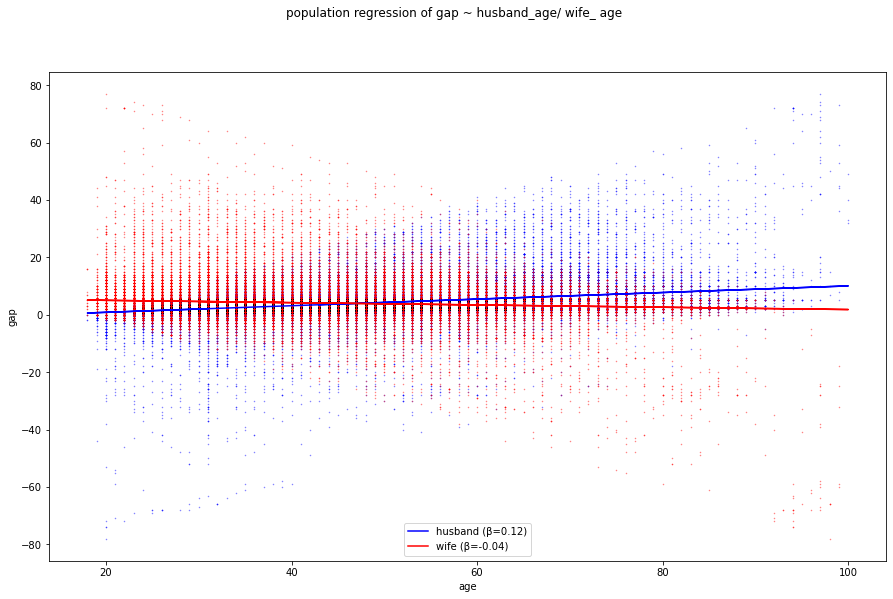

In [181]:
SCATTER_SAMPLE_SIZE = 100000

plt.figure(figsize=(15, 9))

lr = LinearRegression()
X = sdf.husband_age.values[:, np.newaxis]
# target data is array of shape (n,)
y = sdf.gap.values
lr.fit(X, y)
plt.plot(X, lr.predict(X), c='b', label='husband (β=%0.2f)' % lr.coef_)
rng = np.random.default_rng(seed=21)
Xs = rng.choice(X, SCATTER_SAMPLE_SIZE, replace=False)
rng = np.random.default_rng(seed=21)
ys = rng.choice(y, SCATTER_SAMPLE_SIZE, replace=False)
plt.scatter(Xs, ys, c='b', s=1, marker='.', alpha=0.5)


lr = LinearRegression()
X = sdf.wife_age.values[:, np.newaxis]
# target data is array of shape (n,)
y = sdf.gap.values
lr.fit(X, y)
plt.plot(X, lr.predict(X), c='r', label='wife (β=%0.2f)' % lr.coef_)
rng = np.random.default_rng(seed=21)
Xs = rng.choice(X, SCATTER_SAMPLE_SIZE, replace=False)
rng = np.random.default_rng(seed=21)
ys = rng.choice(y, SCATTER_SAMPLE_SIZE, replace=False)
plt.scatter(Xs, ys, c='r', s=1, marker='.', alpha=0.5)

plt.suptitle('population regression of gap ~ husband_age/ wife_ age')
plt.xlabel('age')
plt.ylabel('gap')
plt.legend()
plt.show()

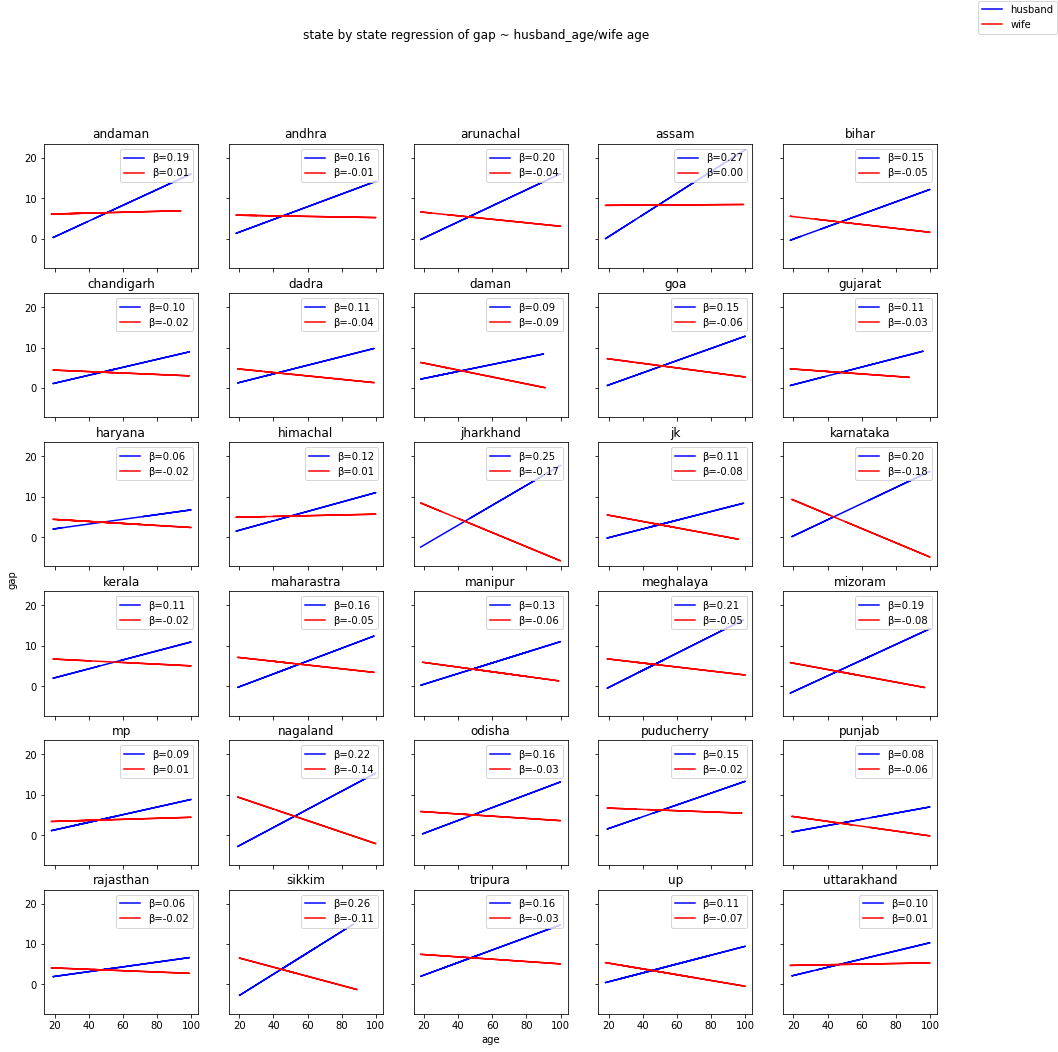

In [182]:
fig, axs = plt.subplots(6, 5, figsize=(16, 16), sharex=True, sharey=True)
fig.suptitle('state by state regression of gap ~ husband_age/wife age')
axs = axs.flatten()
for i, s in enumerate(sorted(sdf.state.unique())):
    #print(s)
    pdf = sdf[sdf.state == s]
    lr = LinearRegression()
    X = pdf.husband_age.values[:, np.newaxis]
    # target data is array of shape (n,)
    y = pdf.gap.values
    lr.fit(X, y)
    l1 = axs[i].plot(X, lr.predict(X), c='b', label='β=%0.2f' % lr.coef_)

    lr = LinearRegression()
    X = pdf.wife_age.values[:, np.newaxis]
    # target data is array of shape (n,)
    y = pdf.gap.values
    lr.fit(X, y)
    l2 = axs[i].plot(X, lr.predict(X), c='r', label='β=%0.2f' % lr.coef_)
    axs[i].set_title(s)
    axs[i].legend(loc='upper right')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)    
# Create the legend
fig.legend(labels=['husband', 'wife'],
           loc="upper right",
           borderaxespad=0.1,
           )
## hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('age')
plt.ylabel('gap')
plt.show()

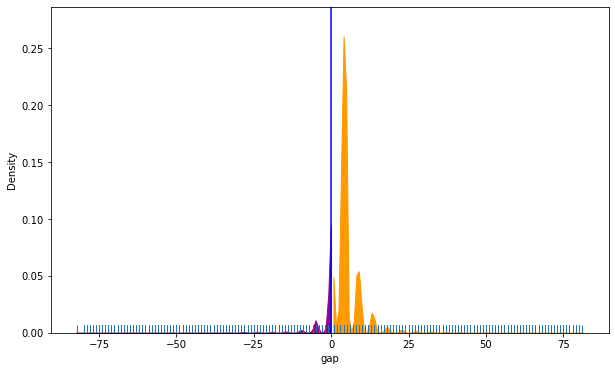

In [183]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=adf, x='gap', color='none')
kde_x, kde_y = ax.lines[0].get_data()

ax.fill_between(kde_x, kde_y, where=(kde_x <= 0), 
                interpolate=False, color='#9A007F')
ax.fill_between(kde_x, kde_y, where=(kde_x >= 0), 
                interpolate=False, color='#FF9A00')
sns.rugplot(data=adf, x='gap')
# plotting the zero line
plt.axvline(x=0, color='#0000FF')
plt.show()

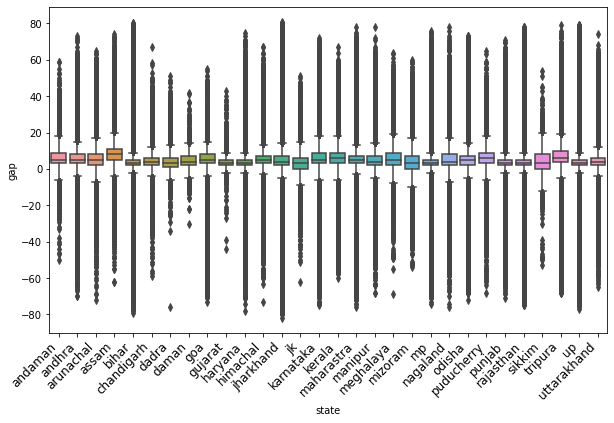

In [184]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=adf, x='state', y='gap')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'
)
plt.show()

In [185]:
# FIXME: random sample to reduce working data for plotly
sdf = adf.sample(100000, random_state=21)
sdf = sdf[(sdf.husband_age>30)&(sdf.husband_age<60)]

In [186]:
bdf = sdf.groupby(['state', 'husband_age']).agg({'gap': 'median'}).reset_index()
bdf

state  husband_age  gap
0        andaman           31  1.0
1        andaman           33  2.0
2        andaman           35  2.5
3        andaman           36  6.5
4        andaman           38  4.0
..           ...          ...  ...
744  uttarakhand           55  5.0
745  uttarakhand           56  5.0
746  uttarakhand           57  6.0
747  uttarakhand           58  3.0
748  uttarakhand           59  4.0

[749 rows x 3 columns]

In [187]:
import plotly.express as px
fig = px.line(bdf, x="husband_age", y="gap", color='state', line_group='state')
fig.show()

In [188]:
fig = px.scatter(sdf, x="husband_age", y="gap", color="state", marginal_y="box", trendline="lowess")
fig.show()